In [ ]:
import scipy as scp
from numpy import random
from numpy import linalg
ncity=100

# random coordinates in 2D for n-cities
R = random.random((ncity,2)) # 도시좌표
city = range(ncity) # 도시 숫자열


In [ ]:
import numpy as np
from numpy import linalg  # numpy의 선형 대수 함수 사용

# 두 점 R1과 R2 사이의 거리 계산하는 함수 정의
def Distance(R1, R2):
    return linalg.norm(R1 - R2)

# 주어진 도시 순서대로 거리를 계산하여 총 거리를 반환하는 함수 정의
def TotalDistance(city, R):
    dist = 0
    for i in range(len(city) - 1):
        # 인접한 두 점 사이의 거리를 누적하여 계산
        dist += Distance(R[city[i]], R[city[i + 1]])
    # 마지막 도시에서 첫 번째 도시로의 거리도 추가
    dist += Distance(R[city[-1]], R[city[0]])
    return dist


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 도시 순서대로 점들을 연결하여 그래프로 그리는 함수 정의
def Plot(city, R, dist):
    Pt = [R[city[i]] for i in range(len(city))]  # 도시 순서에 따른 점들의 리스트
    Pt += [R[city[0]]]  # 처음 도시로 돌아가는 점 추가
    Pt = np.array(Pt)  # 배열로 변환
    plt.title('Total distance=' + str(dist))  # 그래프 제목 설정
    plt.plot(Pt[:, 0], Pt[:, 1], 'o-')  # 점들을 연결한 선 그리기
    plt.show()  # 그래프 출력


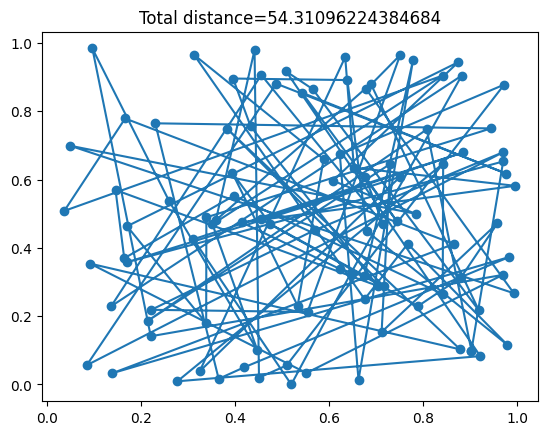

In [ ]:
from pylab import *
Plot(city,R, TotalDistance(city,R))

In [ ]:
# 두 도시를 교환했을 때 비용 변화를 계산하는 함수 정의
def CostSwap(R, city, n, ncity):
    # 현재 교환할 두 도시 간의 거리 차이 계산
    f = Distance(R[city[n]], R[city[n-1]]) + Distance(R[city[(n+1) % ncity]], R[city[(n+2) % ncity]])
    # 교환 후의 두 도시 간의 거리 차이 계산
    s = Distance(R[city[(n+1) % ncity]], R[city[n-1]]) + Distance(R[city[n]], R[city[(n+2) % ncity]])
    # 비용 변화 계산 및 반환
    return s - f

# 두 도시를 교환하는 함수 정의
def Swap(city, n, ncity):
    # 도시 리스트 복사하여 교환
    city_list = list(city)
    city_list[n], city_list[n+1] = city_list[n+1], city_list[n]
    return city_list


In [ ]:
import random
import numpy as np
from numpy import exp

def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    ncity = len(city)  # 도시의 개수

    T = Tstart  # 초기 온도 설정
    dist = TotalDistance(city, R)  # 초기 경로의 거리 계산
    for t in range(maxTsteps):  # 주어진 최대 온도 단계 동안 반복
        accepted = 0  # 수락된 교환 횟수 초기화

        # maxSteps 만큼의 교환 시도
        for i in range(maxSteps):
            n = random.randint(0, ncity - 1)  # 무작위로 교환할 도시 선택
            de = CostSwap(R, city, n, ncity)  # 교환으로 인한 거리 변화 계산

            # Metropolis 알고리즘 적용: 교환을 수락할지 여부 결정
            if de < 0 or exp(-de / T) > random.random():
                accepted += 1
                dist += de  # 거리 업데이트
                city = Swap(city, n, ncity)  # 도시 순서 업데이트

            if accepted > maxAccepted:
                break

        T *= fCool  # 온도를 냉각시킴

        # 반복마다 경로 시각화 및 정보 출력
        Plot(city, R, dist)
        print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist, accepted))

        if accepted == 0:
            break  # 더 이상 수락된 교환이 없으면 종료

    # 최종 경로 반환
    return city


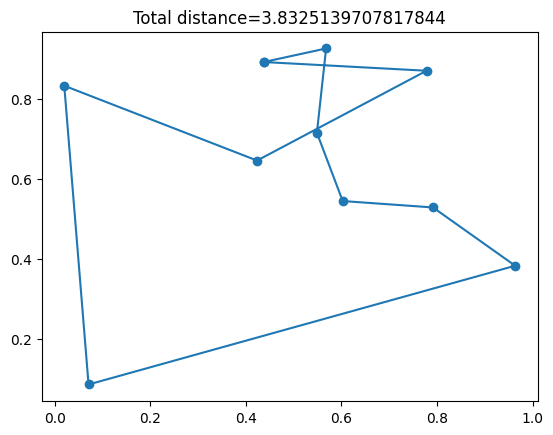

T=   0.18000 , distance=   3.83251 acc.steps=101


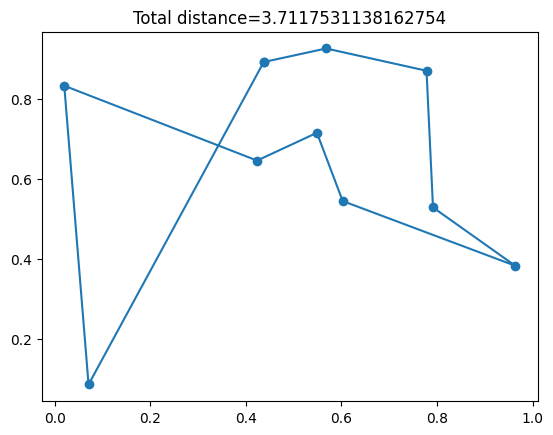

T=   0.16200 , distance=   3.71175 acc.steps=101


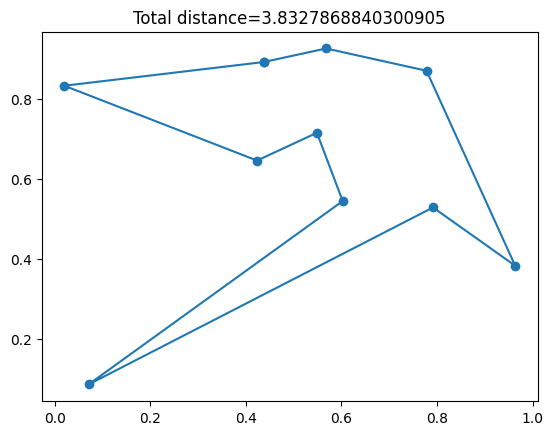

T=   0.14580 , distance=   3.83279 acc.steps=101


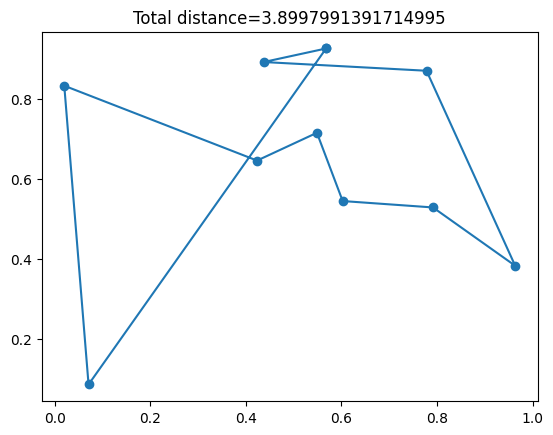

T=   0.13122 , distance=   3.89980 acc.steps=101


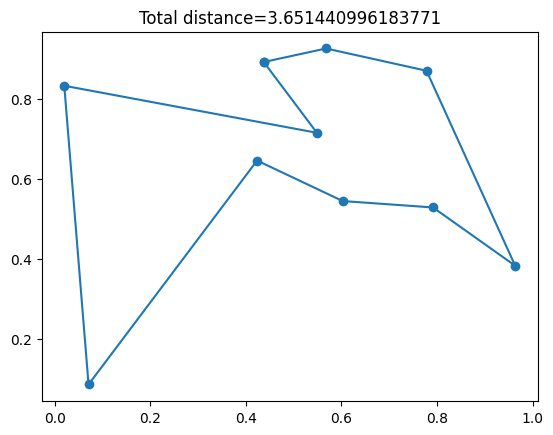

T=   0.11810 , distance=   3.65144 acc.steps=101


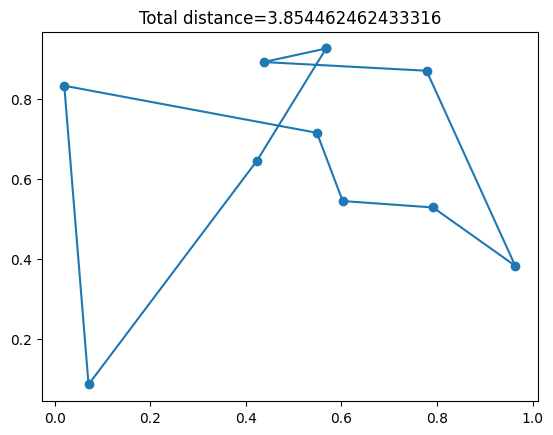

T=   0.10629 , distance=   3.85446 acc.steps=101


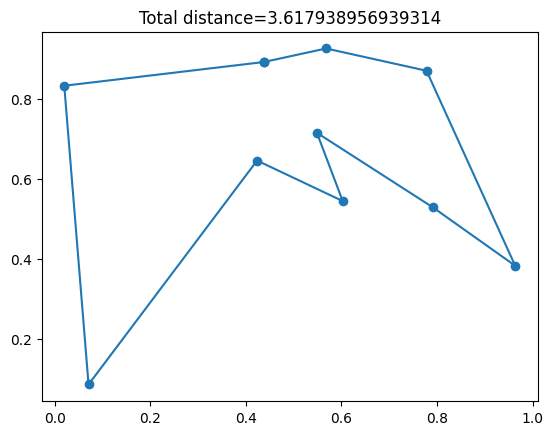

T=   0.09566 , distance=   3.61794 acc.steps=101


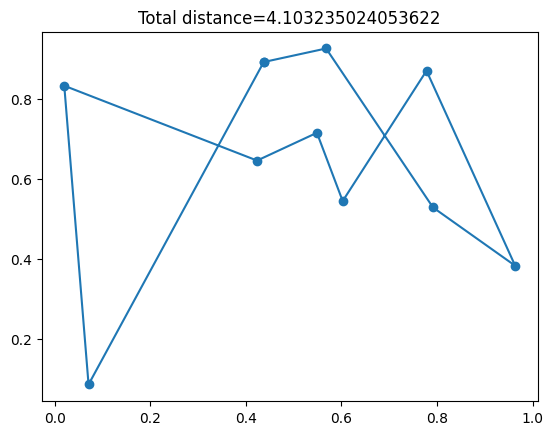

T=   0.08609 , distance=   4.10324 acc.steps=101


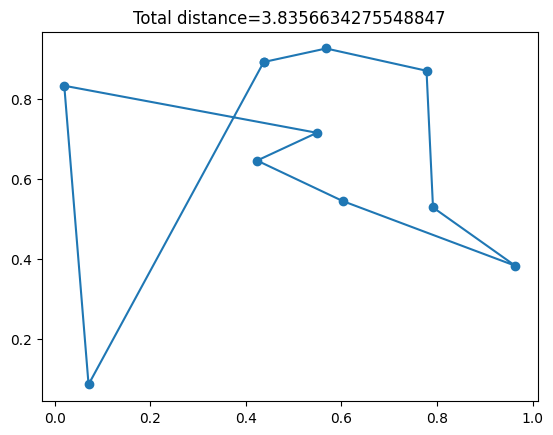

T=   0.07748 , distance=   3.83566 acc.steps=101


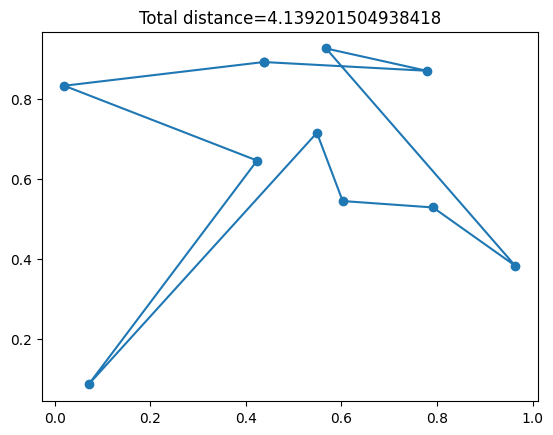

T=   0.06974 , distance=   4.13920 acc.steps=101


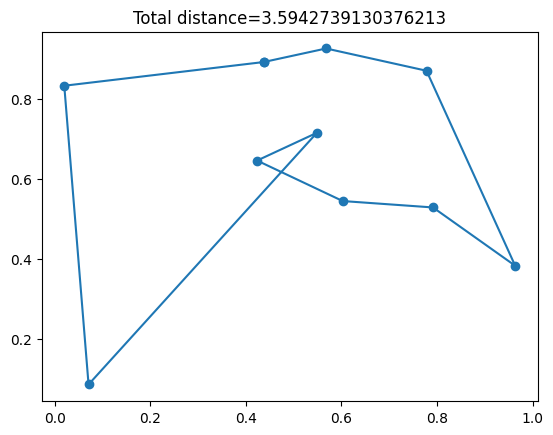

T=   0.06276 , distance=   3.59427 acc.steps=101


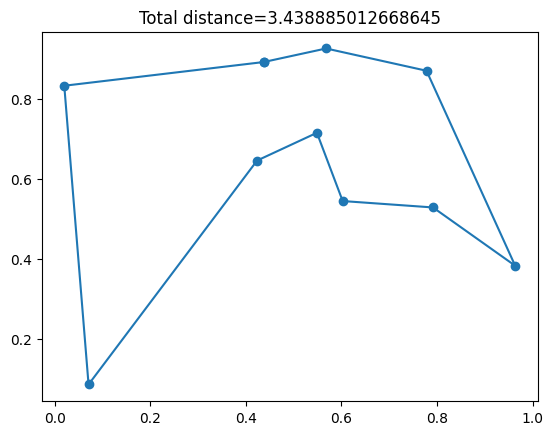

T=   0.05649 , distance=   3.43889 acc.steps=101


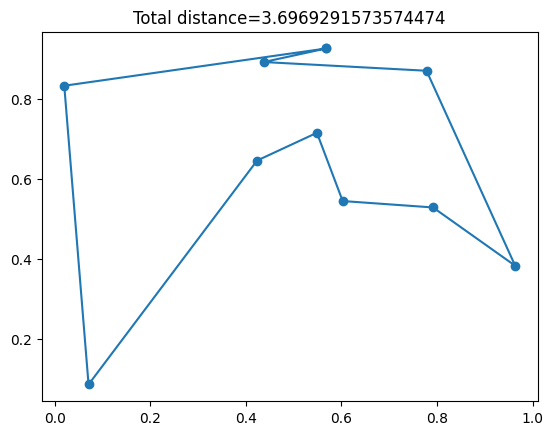

T=   0.05084 , distance=   3.69693 acc.steps=101


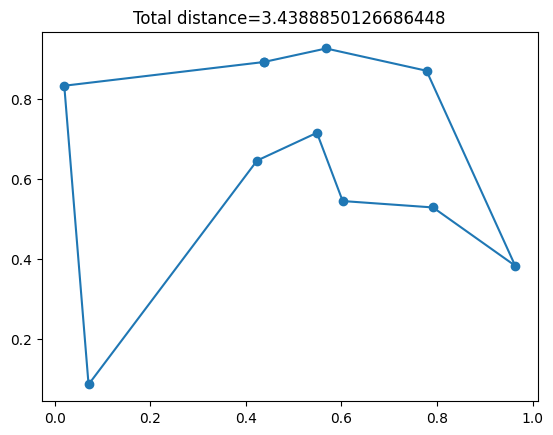

T=   0.04575 , distance=   3.43889 acc.steps=101


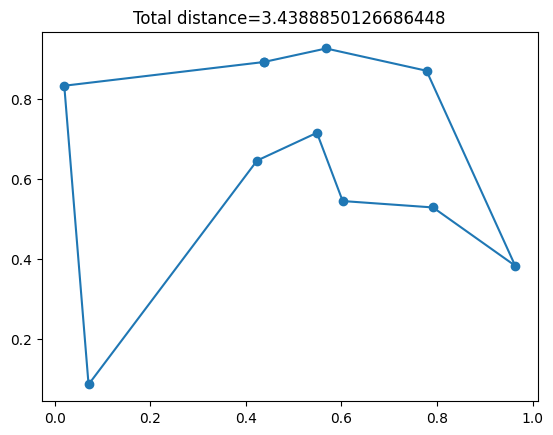

T=   0.04118 , distance=   3.43889 acc.steps=96


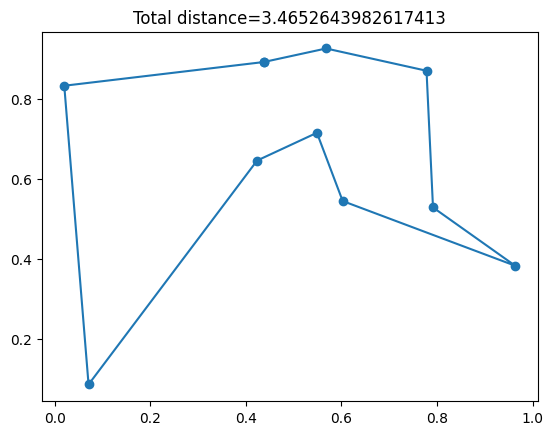

T=   0.03706 , distance=   3.46526 acc.steps=89


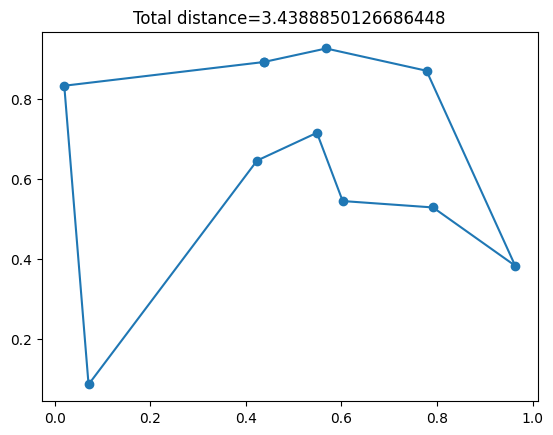

T=   0.03335 , distance=   3.43889 acc.steps=89


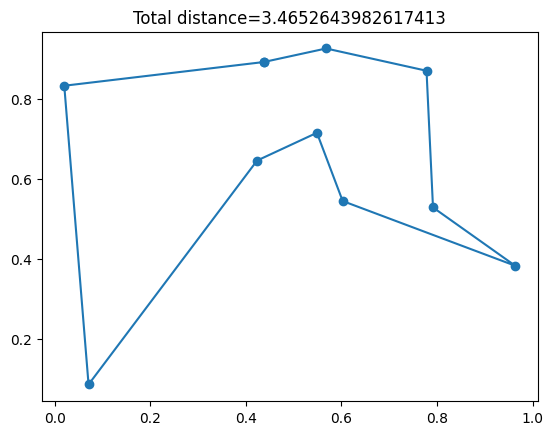

T=   0.03002 , distance=   3.46526 acc.steps=73


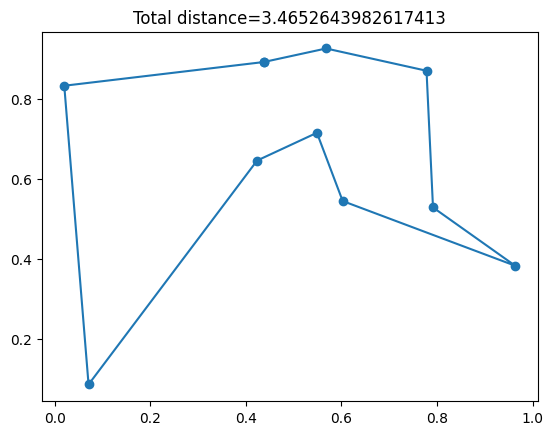

T=   0.02702 , distance=   3.46526 acc.steps=76


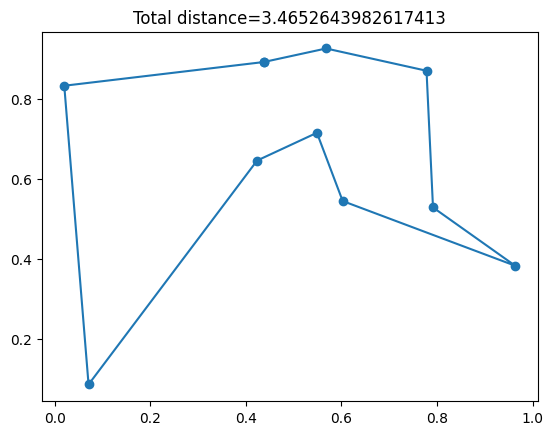

T=   0.02432 , distance=   3.46526 acc.steps=52


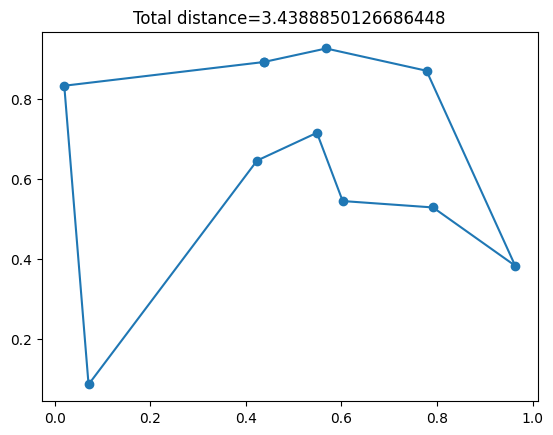

T=   0.02188 , distance=   3.43889 acc.steps=39


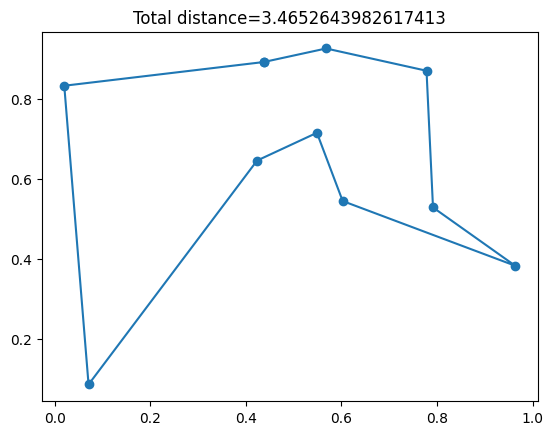

T=   0.01970 , distance=   3.46526 acc.steps=61


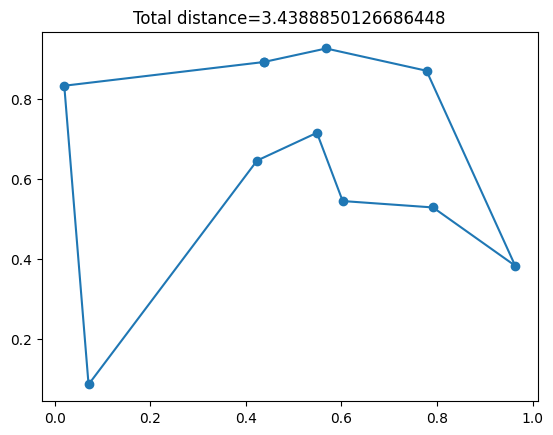

T=   0.01773 , distance=   3.43889 acc.steps=39


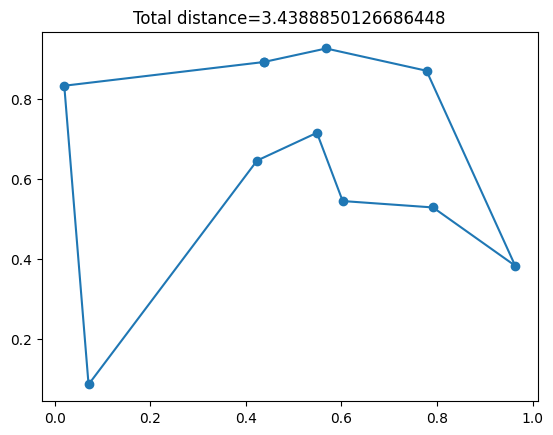

T=   0.01595 , distance=   3.43889 acc.steps=56


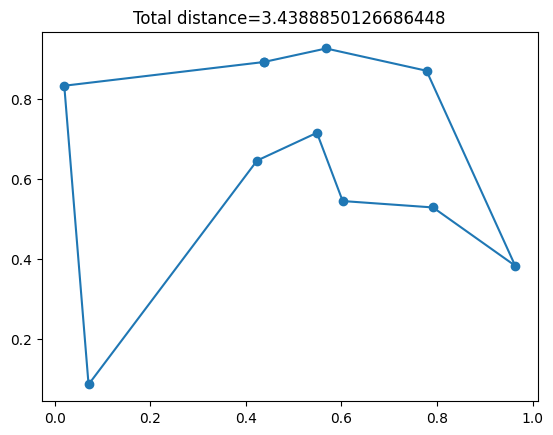

T=   0.01436 , distance=   3.43889 acc.steps=32


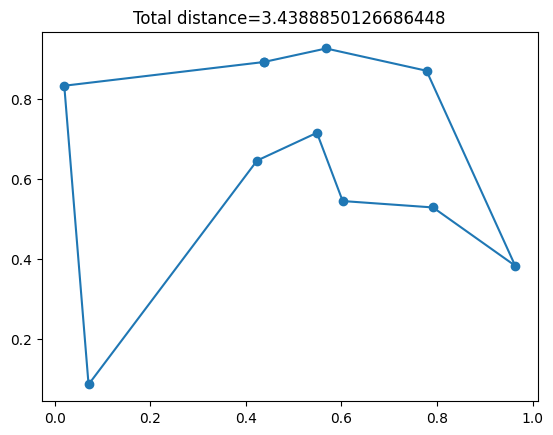

T=   0.01292 , distance=   3.43889 acc.steps=24


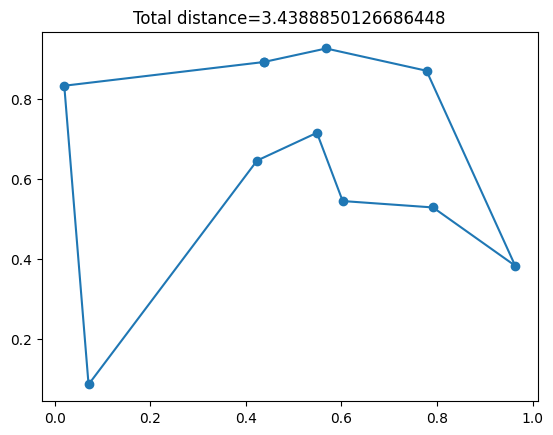

T=   0.01163 , distance=   3.43889 acc.steps=20


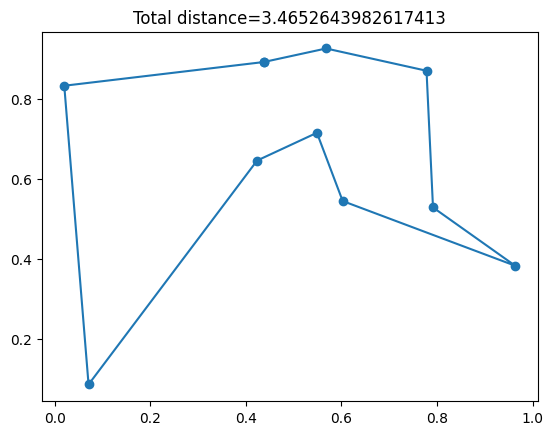

T=   0.01047 , distance=   3.46526 acc.steps=21


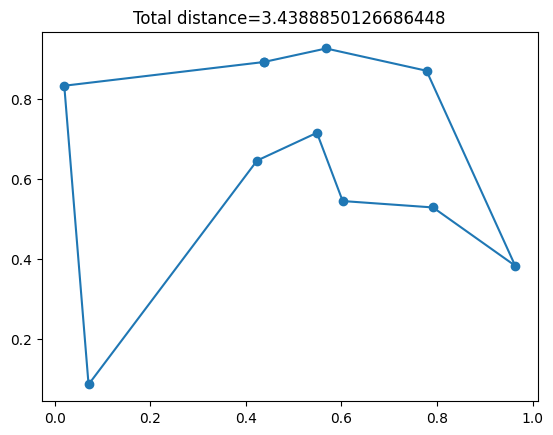

T=   0.00942 , distance=   3.43889 acc.steps=23


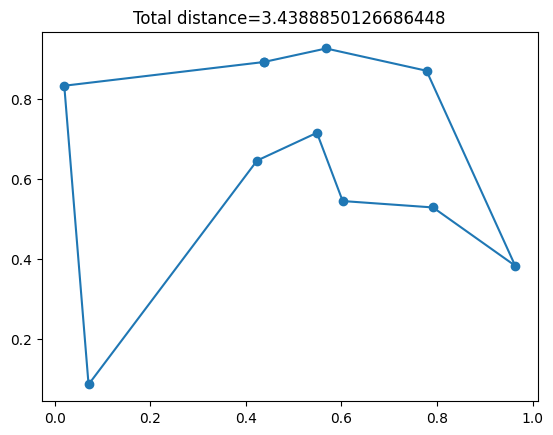

T=   0.00848 , distance=   3.43889 acc.steps=14


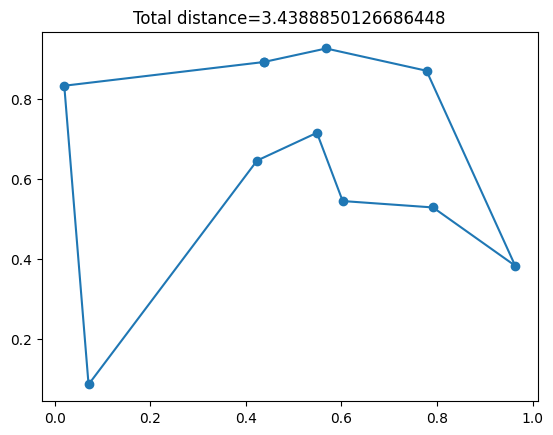

T=   0.00763 , distance=   3.43889 acc.steps=2


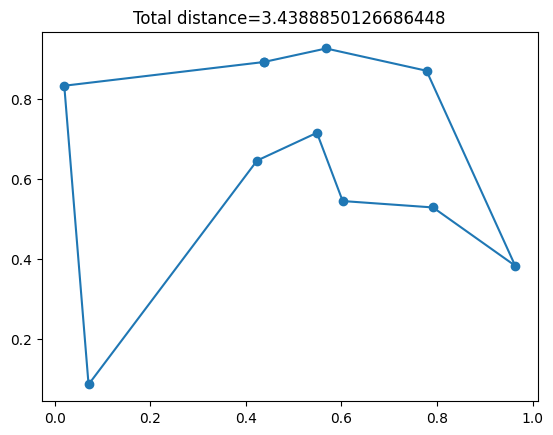

T=   0.00687 , distance=   3.43889 acc.steps=4


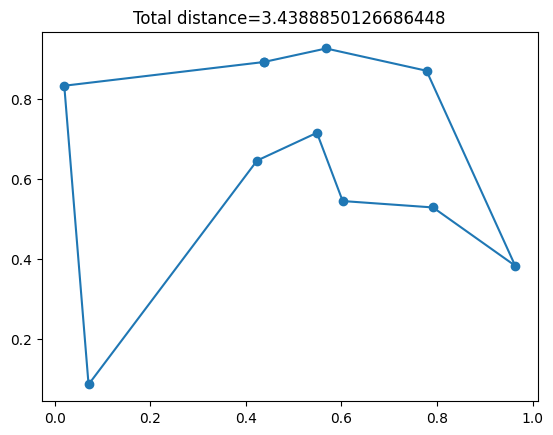

T=   0.00618 , distance=   3.43889 acc.steps=8


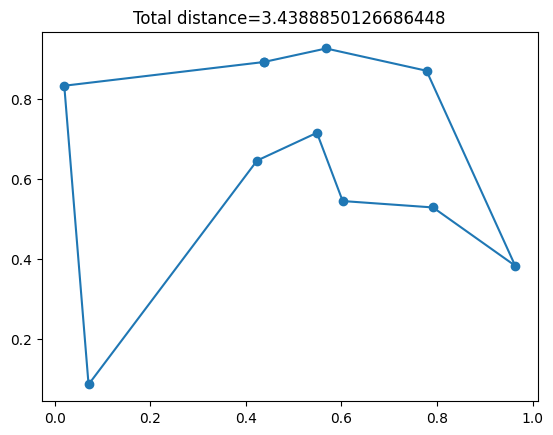

T=   0.00556 , distance=   3.43889 acc.steps=0


In [ ]:
from numpy import random

ncity = 10
maxSteps = 100 * ncity
maxAccepted = 10 * ncity
Tstart = 0.2
fCool = 0.9
maxTsteps = 100

# random.seed(0)  # 매번 다르게 하고 싶다면 주석 처리.

R = random.random((ncity, 2))  # 도시의 좌표를 무작위로 생성
city = list(range(ncity))  # 초기 도시 순서: [0, 1, 2, ..., ncity-1]

# 외판원 문제의 근사해를 찾는 TravelingSalesman 함수 호출
ncity = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)
